In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### 1. Data Reading & Exploring

In [2]:
df = pd.read_csv("mnist_train.csv")

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# the dataset consists of Label & matrix from 1x1 28x28 representing the image
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
df.shape

(60000, 785)

In [6]:
# There are no missing values in the dataset
df.isna().sum().sum()

0

In [7]:
# Number of Unique Labels ==> size of model's output
df['label'].nunique()

10

In [8]:
# number of images for each label
df['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

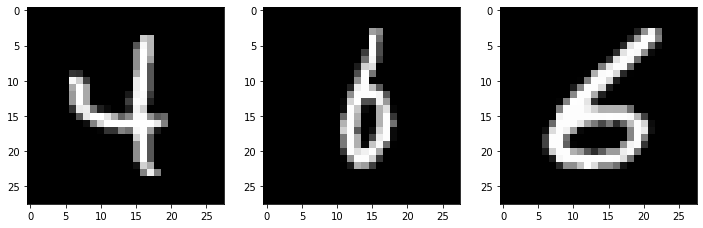

In [9]:
# visualizing some of the data from df
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
rand = np.random.randint(low=0, high=df.shape[0],size=3)
for i,im in enumerate(rand):
  image = df.iloc[im,1:]
  image = np.array(image, dtype='int')
  pixels = image.reshape((28, 28))
  axes[i%3].imshow(pixels, cmap='gray')

In [10]:
# dividing the dataset into features and labels, reshaping the features into array and create categorical field for y
X = df.drop('label', axis=1).values
X = X.reshape(X.shape[0], 28, 28, 1)
y = df['label']
y = to_categorical(y, 10)

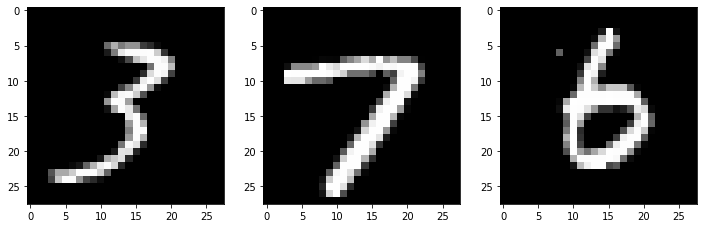

In [11]:
# visualizing some of the data from X after reshaping the data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
rand = np.random.randint(low=0, high=df.shape[0],size=3)
for i,im in enumerate(rand):
  image = X[im]
  image = np.array(image, dtype='int')
  pixels = image.reshape((28, 28))
  axes[i%3].imshow(pixels, cmap='gray')

In [12]:
# dimensions of X & y
print (X.shape)
print (y.shape)

(60000, 28, 28, 1)
(60000, 10)


### 2. CNN Modeling

In [13]:
# create CNN model as Conv2D -> Normalization -> Pooling -> Conv2D -> Flatten -> Dense
model = Sequential()
# start with Conv2D with 10 filters since we are working with images
model.add(Conv2D(10, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
# Batch normalization rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1.
# It helps the learning process and reduce the number of training epochs required to train deep networks
model.add(BatchNormalization())
# Pooling layer is  used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.
model.add(MaxPool2D(2))
# 2nd layer of Conv2D to help read more details and improve the accuracy level
model.add(Conv2D(10, kernel_size=(3,3), activation='relu'))
# conver the data to 1 dimensional data
model.add(Flatten())
# the numbers of possible labels is 10 and we use softmax since it's a categorical problem
model.add(Dense(10, activation='softmax'))

In [14]:
# understanding the structure of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 10)        40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 10)        910       
_________________________________________________________________
flatten (Flatten)            (None, 1210)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12110     
Total params: 13,160
Trainable params: 13,140
Non-trainable params: 20
___________________________________________________

In [15]:
# compile and fit the model - use EarlyStopping & ModelCheckpoint to stop the model when it acheives best results
# use validation_split to split the data and test the model for overfitting
# for this model we will use accuracy to evalaute the performance of the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, batch_size=100, epochs=10, validation_split=0.2, 
          callbacks=[EarlyStopping(patience=2),ModelCheckpoint("best_model.hdf5",save_best_only=True, monitor='val_accuracy', mode='max')])

Epoch 1/10
480/480 [==============================] - 26s 53ms/step - loss: 0.3216 - accuracy: 0.9018 - val_loss: 0.1070 - val_accuracy: 0.9694
Epoch 2/10
480/480 [==============================] - 25s 51ms/step - loss: 0.0849 - accuracy: 0.9743 - val_loss: 0.0716 - val_accuracy: 0.9803
Epoch 3/10
480/480 [==============================] - 25s 52ms/step - loss: 0.0627 - accuracy: 0.9804 - val_loss: 0.0892 - val_accuracy: 0.9731
Epoch 4/10
480/480 [==============================] - 25s 52ms/step - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0634 - val_accuracy: 0.9819
Epoch 5/10
480/480 [==============================] - 25s 52ms/step - loss: 0.0447 - accuracy: 0.9860 - val_loss: 0.0639 - val_accuracy: 0.9821
Epoch 6/10
480/480 [==============================] - 25s 52ms/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0733 - val_accuracy: 0.9802


Text(0.5, 1.0, 'accuracy')

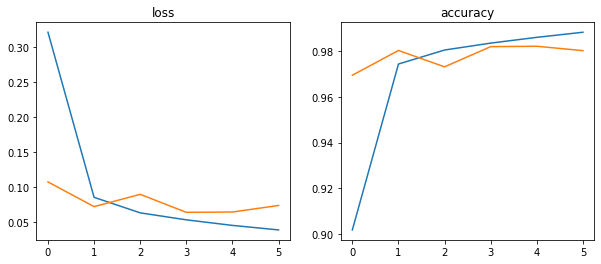

In [16]:
# plotting the loss & accuracy for each epochs
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
axes[0].plot(model.history.history['loss'])
axes[0].plot(model.history.history['val_loss'])
axes[1].plot(model.history.history['accuracy'])
axes[1].plot(model.history.history['val_accuracy'])
axes[0].set_title('loss')
axes[1].set_title('accuracy')

### 3. Predicting MNIST test

In [17]:
# load the model with best parameters
model = load_model("best_model.hdf5")

In [18]:
# read test data 
df_test = pd.read_csv('mnist_test.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# adjust the layout of the data before using them in the model
X_test = df_test.drop('label', axis=1).values
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_test = df_test['label']
y_test = to_categorical(y_test, 10)

In [20]:
# check data dimensions
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(10000, 10)


In [21]:
# evaluate the model on test data - accuracy level remains at 98% 
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0614 - accuracy: 0.9816


[0.06144532933831215, 0.9815999865531921]

In [29]:
print (y_pred[0].round(1))
print (y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
